In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import re

In [11]:
twee=pd.read_csv("C:/Users/Administrator/Desktop/wc/BJP4Karnataka_tweets.csv")
twee.head(100)

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,994600453567590401,BJP Vision for conserving and promoting our cu...,2018-05-10 15:30:01,161,BJP4Karnataka,192289,"Karnataka, India","[{'text': 'BJP4Development', 'indices': [66, 8..."
1,994585351187410944,BJP vision for Conserving and promoting our cu...,2018-05-10 14:30:00,180,BJP4Karnataka,192289,"Karnataka, India","[{'text': 'BJP4Development', 'indices': [66, 8..."
2,994584091226931200,"Mr. Harris,\r\n\r\nKarnataka has not forgotten...",2018-05-10 14:25:00,551,BJP4Karnataka,192289,"Karnataka, India",[]
3,994579058410242049,Congress is notorious for promoting dynasty at...,2018-05-10 14:05:00,352,BJP4Karnataka,192289,"Karnataka, India",[]
4,994577806108618753,BJP Vision For a clean and green Karnataka.\r\...,2018-05-10 14:00:01,211,BJP4Karnataka,192289,"Karnataka, India","[{'text': 'BJP4Development', 'indices': [45, 6..."
5,994577806108618753,BJP Vision For a clean and green Karnataka.\r\...,2018-05-10 14:00:01,211,BJP4Karnataka,192289,"Karnataka, India","[{'text': 'BJP4Development', 'indices': [45, 6..."
6,994575993326235648,Today Kannadigas identify @siddaramaiah's gove...,2018-05-10 13:52:49,197,BJP4Karnataka,192289,"Karnataka, India",[]
7,994570253140135936,A vision for growth in all regions of the stat...,2018-05-10 13:30:01,146,BJP4Karnataka,192289,"Karnataka, India","[{'text': 'BJP4Development', 'indices': [50, 6..."
8,994563550600421377,RT @AmitShah: The writing on the wall is clear...,2018-05-10 13:03:23,1987,BJP4Karnataka,192289,"Karnataka, India",[]
9,994561930529456129,RT @BSYBJP: Our campaign was based on my party...,2018-05-10 12:56:56,889,BJP4Karnataka,192289,"Karnataka, India",[]


In [16]:
def wc(tweets,col):
    words=' '.join(twee[col])
    colmask=np.array(Image.open("C:/Users/Administrator/Desktop/wc/Karnataka.png"))
    stopwords=set(STOPWORDS)
    wcd=WordCloud(background_color='black',mask=colmask,stopwords=stopwords,min_font_size=16).generate(words)
    
    plt.figure(figsize=(20,10))
    plt.imshow(wcd)
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()

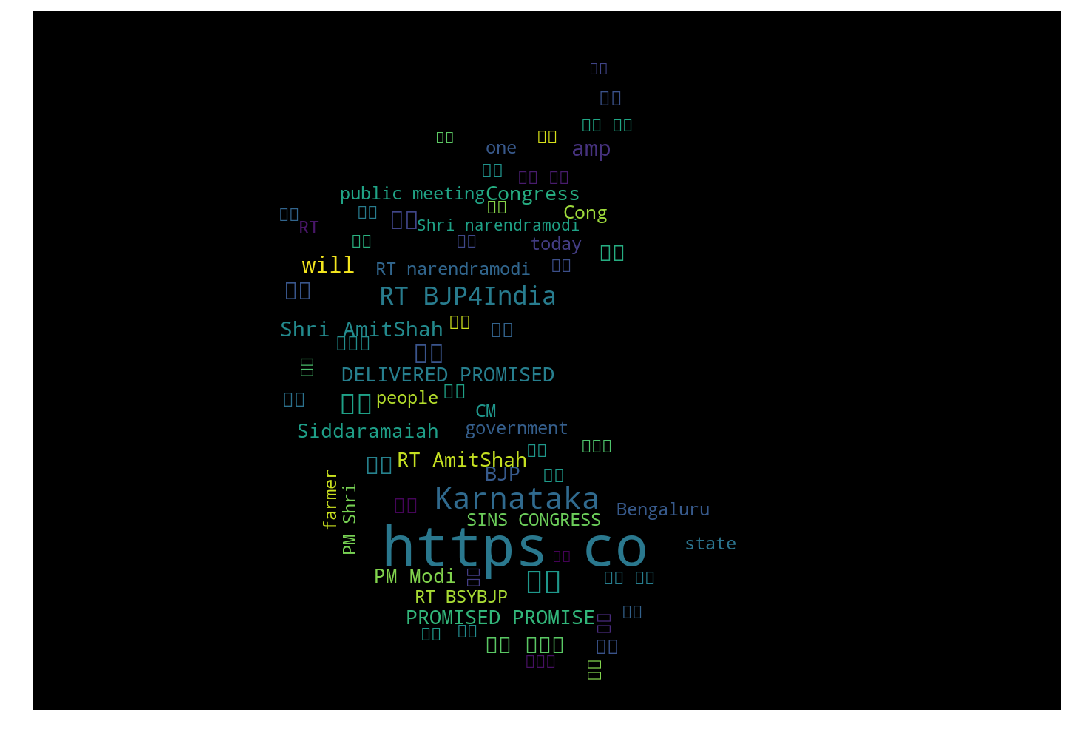

In [17]:
wc(twee,'text')